In [1]:
import pandas as pd
import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly.graph_objs import Scatter
import plotly.figure_factory as ff
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
init_notebook_mode(connected=True)
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import json
from fbprophet import Prophet


C:\Users\ayush.LAPTOP-A9620OED\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [2]:
df = pd.read_csv('data/bitcoin.csv')

In [3]:
df.shape

(2016354, 8)

In [4]:
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2016349,1541894160,6347.41,6347.42,6347.41,6347.42,0.484960,3078.241490,6347.417225
2016350,1541894220,6347.41,6347.42,6347.41,6347.42,0.770757,4892.318043,6347.419294
2016351,1541894280,6347.41,6347.42,6347.41,6347.42,1.213145,7700.341614,6347.418653
2016352,1541894340,6347.41,6347.42,6347.41,6347.42,1.714091,10880.053958,6347.418881
2016353,1541894400,6347.42,6347.42,6347.41,6347.42,0.489324,3105.944897,6347.417439


In [5]:
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')

In [6]:
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2016349,2018-11-10 23:56:00,6347.41,6347.42,6347.41,6347.42,0.484960,3078.241490,6347.417225
2016350,2018-11-10 23:57:00,6347.41,6347.42,6347.41,6347.42,0.770757,4892.318043,6347.419294
2016351,2018-11-10 23:58:00,6347.41,6347.42,6347.41,6347.42,1.213145,7700.341614,6347.418653
2016352,2018-11-10 23:59:00,6347.41,6347.42,6347.41,6347.42,1.714091,10880.053958,6347.418881
2016353,2018-11-11 00:00:00,6347.42,6347.42,6347.41,6347.42,0.489324,3105.944897,6347.417439


In [7]:
df.set_index('Timestamp', inplace=True)

In [8]:
df = df.resample('D').mean()

In [9]:
df_month = df.resample('M').mean()

In [10]:
iplot([go.Scatter(x=df_month.index, y=df_month.Weighted_Price, mode='markers')])

In [11]:
iplot([go.Bar(x=df_month.index, y=df_month.Weighted_Price)])

In [12]:
trace = go.Scatter(
    x = df.index,
    y = df.Weighted_Price,
    mode = 'lines',
    name = 'Weighted Price'
)

layout = dict(
    title='Bitcoin Weighted Prices ',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In [13]:
series = df_month.Weighted_Price
result = seasonal_decompose(series, model='additive')

In [14]:
iplot([go.Scatter(x=series.index, y=result.trend, mode='lines')])

In [15]:
iplot([go.Scatter(x=series.index, y=result.seasonal, mode='lines')])

In [16]:
iplot([go.Scatter(x=series.index, y=result.resid, mode='lines')])

In [17]:
fig = iplot([go.Scatter(x=series.index, y=result.resid, mode='lines')])

In [18]:
# Test for flask
trace = go.Scatter(
        x=series.index, 
        y=result.resid, 
        mode='lines'
    )

data = [trace]
graphJSON = json.dumps(data, cls=plotly.utils.PlotlyJSONEncoder)
# return render_template('index1.html',graphJSON=graphJSON)

In [19]:
plotly.offline.plot(data, include_plotlyjs=False, output_type='div')

'<div id="a8e9da98-1d38-4dc0-857f-f7e4a879bb9e" style="height: 100%; width: 100%;" class="plotly-graph-div"></div><script type="text/javascript">window.PLOTLYENV=window.PLOTLYENV || {};window.PLOTLYENV.BASE_URL="https://plot.ly";Plotly.newPlot("a8e9da98-1d38-4dc0-857f-f7e4a879bb9e", [{"type": "scatter", "x": ["2014-12-31", "2015-01-31", "2015-02-28", "2015-03-31", "2015-04-30", "2015-05-31", "2015-06-30", "2015-07-31", "2015-08-31", "2015-09-30", "2015-10-31", "2015-11-30", "2015-12-31", "2016-01-31", "2016-02-29", "2016-03-31", "2016-04-30", "2016-05-31", "2016-06-30", "2016-07-31", "2016-08-31", "2016-09-30", "2016-10-31", "2016-11-30", "2016-12-31", "2017-01-31", "2017-02-28", "2017-03-31", "2017-04-30", "2017-05-31", "2017-06-30", "2017-07-31", "2017-08-31", "2017-09-30", "2017-10-31", "2017-11-30", "2017-12-31", "2018-01-31", "2018-02-28", "2018-03-31", "2018-04-30", "2018-05-31", "2018-06-30", "2018-07-31", "2018-08-31", "2018-09-30", "2018-10-31", "2018-11-30"], "y": [null, null

In [20]:
graphJSON

'[{"type": "scatter", "x": ["2014-12-31", "2015-01-31", "2015-02-28", "2015-03-31", "2015-04-30", "2015-05-31", "2015-06-30", "2015-07-31", "2015-08-31", "2015-09-30", "2015-10-31", "2015-11-30", "2015-12-31", "2016-01-31", "2016-02-29", "2016-03-31", "2016-04-30", "2016-05-31", "2016-06-30", "2016-07-31", "2016-08-31", "2016-09-30", "2016-10-31", "2016-11-30", "2016-12-31", "2017-01-31", "2017-02-28", "2017-03-31", "2017-04-30", "2017-05-31", "2017-06-30", "2017-07-31", "2017-08-31", "2017-09-30", "2017-10-31", "2017-11-30", "2017-12-31", "2018-01-31", "2018-02-28", "2018-03-31", "2018-04-30", "2018-05-31", "2018-06-30", "2018-07-31", "2018-08-31", "2018-09-30", "2018-10-31", "2018-11-30"], "y": [null, null, null, null, null, null, 294.9009210460548, 727.1577586140386, 578.0597956221334, 701.653440330008, 531.2122728121174, -68.15488229350831, -2313.4730494518085, -1454.7942249194941, -191.71704586519456, 60.97924525613064, 537.1228927728743, 312.26023794773585, 417.4180951048656, 800

In [21]:
residual = result.resid
residual.dropna(inplace=True)
print('p value: ', adfuller(residual, autolag = 'AIC', regression = 'ct')[1])

p value:  0.02195703572368413


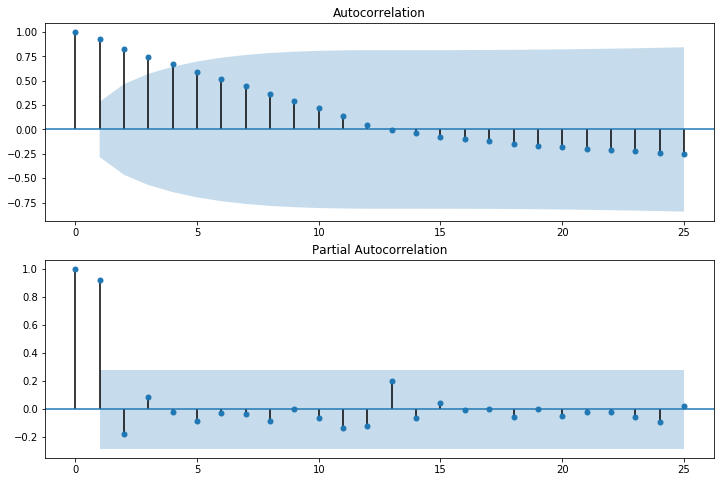

In [22]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_month.Weighted_Price, lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_month.Weighted_Price, lags=25, ax=ax2)
plt.show()

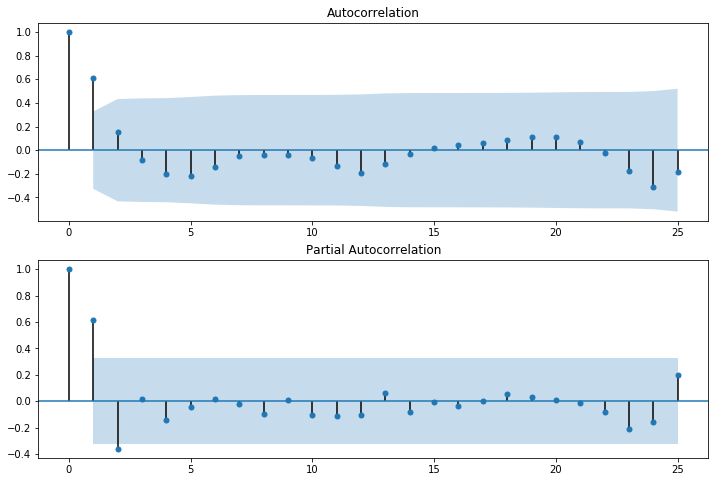

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(result.resid, lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(result.resid, lags=25, ax=ax2)
plt.show()

In [24]:
m = Prophet()

In [25]:
df.reset_index(inplace=True)

In [26]:
df.rename(columns={'Timestamp': 'ds', 'Weighted_Price':'y'}, inplace=True)

In [27]:
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\ayush.LAPTOP-A9620OED\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [28]:
future = m.make_future_dataframe(periods=50)
future.tail()

,ds
1487,2018-12-27
1488,2018-12-28
1489,2018-12-29
1490,2018-12-30
1491,2018-12-31


In [29]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1487,2018-12-27,6978.892038,5999.541383,8052.846854
1488,2018-12-28,6909.170590,5895.678292,7966.158636
1489,2018-12-29,6871.616902,5883.528069,7997.978899
1490,2018-12-30,6785.745051,5728.179529,7948.580484
1491,2018-12-31,6703.839415,5631.682971,7760.738122


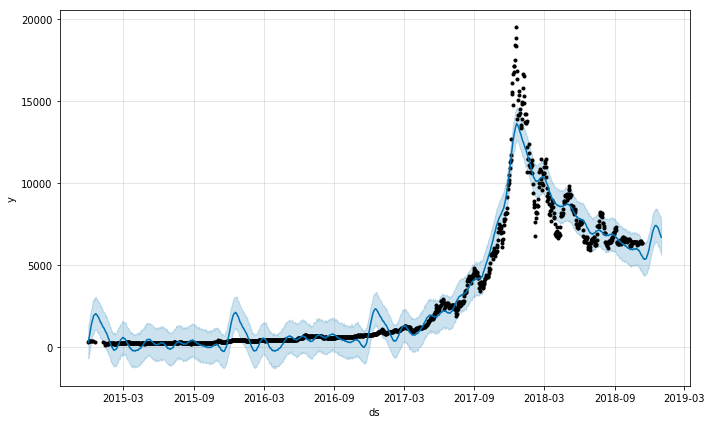

In [30]:
fig1 = m.plot(forecast)

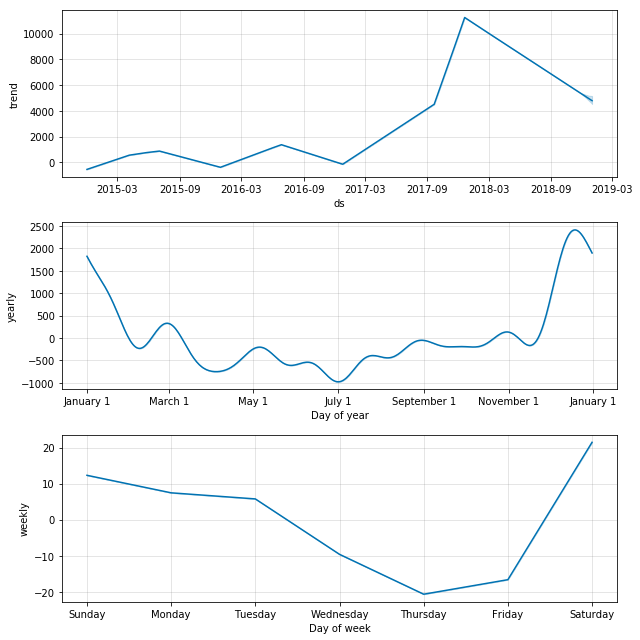

In [31]:
fig2 = m.plot_components(forecast)